In [1]:
import pandas as pd
import numpy as np
import setup_jwlab
from jwlab.constants import cleaned_data_filepath
from jwlab.cluster_analysis_perm import cluster_analysis_procedure
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate, RepeatedKFold
from scipy import stats
import more_itertools as mit
from sklearn.metrics import accuracy_score


In [2]:
# Argument 1: 9 or 11 (month olds)
# Argument 2: Boolean, True to randomize the labels, False otherwise
# Argument 3: averaging, could be: no_averaging, average_trials, average_trials_and_participants, permutation
# Argument 4: sliding_window_config[start_time, end_time, window_lengths[], step_length]
# Argument 5: cross_val_config[num_fold, num_iterations]

#cluster_analysis_procedure(9, False, "permutation", [-200, 1000, [10, 20, 40, 60], 10], [3, 5])

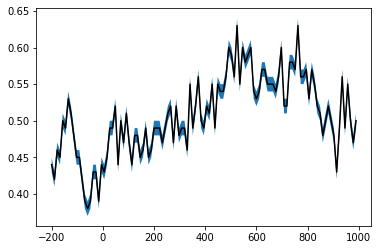

Valid windows are: [6, 23, 45, 50, 52, 53, 56, 58, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 100, 105, 107]

Clusters are: [[400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760]]

The max t mass is: 334.1937741419212

334.1937741419212


In [3]:
tmass = cluster_analysis_procedure(11, False, "permutation", [-200, 1000, [100], 10], [3, 100])
print(tmass)

In [2]:
itr = 50 
arrTmass = []

for i in range(itr):
    tmass = cluster_analysis_procedure(11, True, "permutation", [-200, 1000, [100], 10], [3, 15])
    arrTmass.append(round(tmass, 4))
    print(i)
print(arrTmass)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
[43.6842, 73.1222, 46.6419, 69.4672, 29.4192, 63.2094, 36.1431, 0, 42.4292, 72.7391, 51.3735, 46.6688, 24.4066, 62.5084, 61.4025, 70.0428, 39.832, 42.3616, 33.9865, 60.6733, 74.8968, 51.9854, 47.5124, 77.9796, 0, 80.3137, 61.6552, 35.2167, 55.7662, 41.4447, 90.0099, 56.3264, 52.7276, 70.5842, 41.4213, 52.1001, 82.6638, 102.5435, 43.6135, 49.3459, 41.5203, 31.7759, 58.5461, 82.0897, 23.7944, 47.1813, 68.6495, 44.1644, 37.0971, 37.1818]


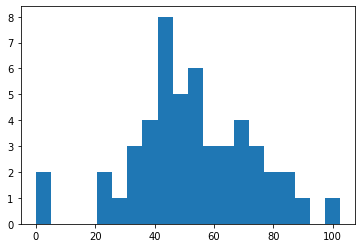

In [3]:
import matplotlib.pyplot as plt

plt.hist(arrTmass, bins = 20)
plt.show()